In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#aprox. time 00:04:32

accidents = pd.read_csv('../data/MA3_finished.csv', index_col='ID')
accidents.dtypes

Unnamed: 0                 int64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout

In [2]:
# Start_Time and End_Time are objects, so we will convert them to DateTime-Objects

accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'])

# after that we are able to extract hour, day, month and year of each date

accidents['Hour'] = accidents['Start_Time'].dt.hour
accidents['Day'] = accidents['Start_Time'].dt.day
accidents['Month'] = accidents['Start_Time'].dt.month
accidents['Year'] = accidents['Start_Time'].dt.year

# we will see the new added columns (extracted parts of the start date time)
accidents.head()

,Unnamed: 0,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,...,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Duration,State Name,Region,Division
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,...,Day,Day,2016,2,8,6,1800.0,Ohio,Midwest,East North Central
1,1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,...,Day,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central
2,2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,...,Day,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central
3,3,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,...,Day,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central
4,4,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,...,Day,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central


In [3]:
nan_count = accidents['Temperature(F)'].isna().sum()

print(f"Anzahl der NaN-Werte in der 'Temperature(F)'-Spalte: {nan_count}")

Anzahl der NaN-Werte in der 'Temperature(F)'-Spalte: 0


In [4]:
# Example for Binning

#dropping al NaN (Temperature) rows
accidents_cleaned = accidents.dropna(subset=['Temperature(F)'])

#setting edges by ourself, because otherwise all tempperatures will result in 'moderate' when we let it automatically decide
bin_edges = [float('-inf'), 32, 50, 65, 80, float('inf')]
bin_labels = ['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
# Setting bins to 5, could also set 3 (cold, moderate, hot)
accidents_cleaned['Temperature_Bin'] = pd.cut(accidents_cleaned['Temperature(F)'], bins=bin_edges, labels=bin_labels)

accidents_cleaned

,Unnamed: 0,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,...,Astronomical_Twilight,Year,Month,Day,Hour,Duration,State Name,Region,Division,Temperature_Bin
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,...,Day,2016,2,8,6,1800.0,Ohio,Midwest,East North Central,Cold
1,1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,...,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central,Cold
2,2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,...,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central,Cold
3,3,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,...,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central,Cold
4,4,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,...,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central,Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051551,7051551,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,...,Day,2019,8,23,18,1716.0,California,West,Pacific,Hot
7051552,7051552,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,...,Day,2019,8,23,19,1613.0,California,West,Pacific,Warm
7051553,7051553,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,...,Day,2019,8,23,19,1708.0,California,West,Pacific,Warm


In [5]:
#One-Hot-Encoding
#Encoding all Weather Conditions

accidents_cleaned = pd.get_dummies(accidents_cleaned, columns=['Weather_Condition'], drop_first=True, prefix='Weather')
accidents_cleaned

,Unnamed: 0,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,...,Weather_Thunder and Hail / Windy,Weather_Thunder in the Vicinity,Weather_Thunderstorm,Weather_Thunderstorms and Rain,Weather_Thunderstorms and Snow,Weather_Tornado,Weather_Widespread Dust,Weather_Widespread Dust / Windy,Weather_Wintry Mix,Weather_Wintry Mix / Windy
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,...,False,False,False,False,False,False,False,False,False,False
1,1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,...,False,False,False,False,False,False,False,False,False,False
2,2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,...,False,False,False,False,False,False,False,False,False,False
3,3,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,...,False,False,False,False,False,False,False,False,False,False
4,4,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051551,7051551,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,...,False,False,False,False,False,False,False,False,False,False
7051552,7051552,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,...,False,False,False,False,False,False,False,False,False,False
7051553,7051553,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#Creating time series

# Konvertiere 'Start_Time' in ein DateTime-Objekt
accidents_cleaned['Start_Time'] = pd.to_datetime(accidents_cleaned['Start_Time'])

# Setze 'Start_Time' als Index für die Time Series
accidents_cleaned.set_index('Start_Time', inplace=True)

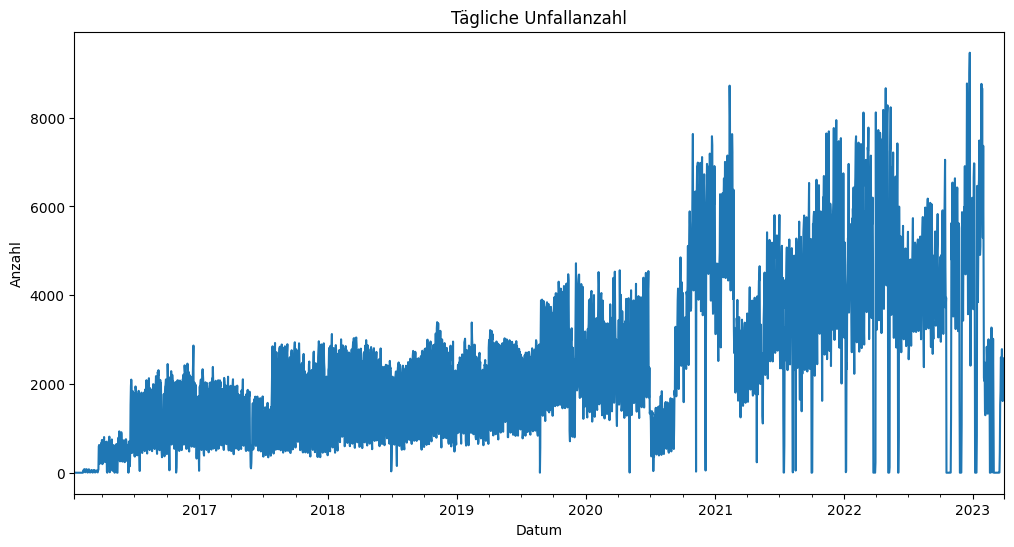

In [7]:
# Calculate daily accidents
daily_accidents = accidents_cleaned.resample('D').size()

# daily accidents graph
plt.figure(figsize=(12, 6))
daily_accidents.plot(title='Tägliche Unfallanzahl', xlabel='Datum', ylabel='Anzahl')
plt.show()

In [8]:
#takes a lot of time prbbly because of the hot-encoding
accidents_cleaned.to_csv('../data/MA4_finished.csv')